<font size="+3"><b>Assignment 3: Non-Linear Models and Validation Metrics</b></font>

***
* **Full Name** =
* **UCID** =
***

<font color='Blue'>
In this assignment, you will need to write code that uses non-linear models to perform classification and regression tasks. You will also be asked to describe the process by which you came up with the code. More details can be found below. Please cite any websites or AI tools that you used to help you with this assignment.
</font>

|                **Question**                | **Point** |
|:------------------------------------------:|:---------:|
|           **Part 1: Regression**           |  **14.5** |
|          Step 0: Import Libraries          |           |
|             Step 1: Data Input             |    0.5    |
|           Step 2: Data Processing          |     0     |
| Step 3: Implement   Machine Learning Model |    0.5    |
|           Step 4: Validate Model           |    0.5    |
|         Step 5: Visualize   Results        |     3     |
|                  Questions                 |     6     |
|             Process Description            |     4     |
|         **Part 2: Classification**         |  **17.5** |
|             Step 1: Data Input             |     2     |
|           Step 2: Data Processing          |    1.5    |
| Step 3: Implement   Machine Learning Model |           |
|            Step 4: Validate Mode           |           |
|         Step 5: Visualize   Results        |     4     |
|                  Questions                 |     6     |
|             Process Description            |     4     |
|   **Part 3: Observations/Interpretation**  |   **3**   |
|           **Part 4: Reflection**           |   **2**   |
|                  **Total**                 |   **37**  |
|                                            |           |
|                  **Bonus**                 |           |
|         **Part 5: Bonus Question**         |   **3**   |

### Import Libraries

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# **Part 1: Regression (14.5 marks)**

For this section, we will be continuing with the concrete example from yellowbrick. You will need to compare these results to the results from the previous assignment. Please use the results from the solution if you were unable to complete Assignment 2

## **Step 1:** Data Input (0.5 marks)

The data used for this task can be downloaded using the yellowbrick library:
https://www.scikit-yb.org/en/latest/api/datasets/concrete.html

Use the yellowbrick function `load_concrete()` to load the concrete dataset into the feature matrix `X` and target vector `y`.

In [2]:
# TO DO: Import concrete dataset from yellowbrick library
from yellowbrick.datasets import load_concrete
from ucimlrepo import fetch_ucirepo 

  
# data (as pandas dataframes) 
X, y = load_concrete()

print("X size:", X.size)
print("y size:", y.size)
print("X type:", type(X))
print("y type:", type(y))


X size: 8240
y size: 1030
X type: <class 'pandas.core.frame.DataFrame'>
y type: <class 'pandas.core.series.Series'>


## **Step 2:** Data Processing (0 marks)

Data processing was completed in the previous assignment. No need to repeat here.

<font color='red'>
This is just for your information and no action is required from you for this step.
</font>

## **Step 3:** Implement Machine Learning Model (0.5 marks)

1. Import the Decision Tree, Random Forest and Gradient Boosting Machines regression models from sklearn
2. Instantiate the three models with `max_depth = 5`. Are there any other parameters that you will need to set?
3. Implement each machine learning model with `X` and `y`

## **Step 4:** Validate Model (0.5 marks)

Calculate the average training and validation accuracy using mean squared error with cross-validation. To do this, you will need to set `scoring='neg_mean_squared_error'` in your `cross_validate` function and negate the results (multiply by -1)

## **Step 5:** Visualize Results (3 marks)

1. Create a pandas DataFrame `results` with columns: Training accuracy and Validation accuracy, and index: DT, RF and GB
2. Add the accuracy results to the `results` DataFrame
3. Print `results`

In [7]:
# TO DO: ADD YOUR CODE HERE FOR STEPS 3-5
# Note: for any random state parameters, you can use random_state = 0
# HINT: USING A LOOP TO STORE THE DATA IN YOUR RESULTS DATAFRAME WILL BE MORE EFFICIENT
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import cross_validate
from sklearn.metrics import mean_squared_error


dtregressor = DecisionTreeRegressor(max_depth=5, random_state = 0)#from sci-kit learn
#for the random forest and gradient boosting regressors, we need to specify the number of trees to use(n_estimators)
rfregressor = RandomForestRegressor(n_estimators = 100, random_state = 0, max_depth = 5)
gbregressor = GradientBoostingRegressor(max_depth = 5, random_state = 0, n_estimators = 100, learning_rate = 0.1)

dtregressor.fit(X, y)
rfregressor.fit(X, y)
gbregressor.fit(X,y)


# Cross-validate Decision Tree Regressor
dt_scores = cross_validate(dtregressor, X, y, scoring='neg_mean_squared_error', cv=5, return_train_score=True)
dt_train_mse = -1 * dt_scores['train_score']
dt_val_mse = -1 * dt_scores['test_score']

# Cross-validate Random Forest Regressor
rf_scores = cross_validate(rfregressor, X, y, scoring='neg_mean_squared_error', cv=5, return_train_score=True)
rf_train_mse = -1 * rf_scores['train_score']
rf_val_mse = -1 * rf_scores['test_score']

# Cross-validate Gradient Boosting Regressor
gb_scores = cross_validate(gbregressor, X, y, scoring='neg_mean_squared_error', cv=5, return_train_score=True)
gb_train_mse = -1 * gb_scores['train_score']
gb_val_mse = -1 * gb_scores['test_score']

# Calculate average training and validation MSE
avg_dt_train_mse = np.mean(dt_train_mse)
avg_dt_val_mse = np.mean(dt_val_mse)

avg_rf_train_mse = np.mean(rf_train_mse)
avg_rf_val_mse = np.mean(rf_val_mse)

avg_gb_train_mse = np.mean(gb_train_mse)
avg_gb_val_mse = np.mean(gb_val_mse)

print("Decision Tree:")
print(f"Average Training MSE: {avg_dt_train_mse}")
print(f"Average Validation MSE: {avg_dt_val_mse}\n")

print("Random Forest:")
print(f"Average Training MSE: {avg_rf_train_mse}")
print(f"Average Validation MSE: {avg_rf_val_mse}\n")

print("Gradient Boosting:")
print(f"Average Training MSE: {avg_gb_train_mse}")
print(f"Average Validation MSE: {avg_gb_val_mse}\n")

#chat gpt used here. In the process description remember to include the prompts and explain thought process
#here, I think a higher MSE indicates better performance in this case, since we used "scoring = neg_mean_squared_error"

results_data = {
    'Training MSE': [47.91856102734339, 32.05543206759723, 3.739270010942101],
    'Validation MSE': [163.08777547307804, 156.40497179627897, 99.3602591572192]
}

index = ['DT', 'RF', 'GB']
results_df = pd.DataFrame(results_data, index=index)
print(results_df)

Decision Tree:
Average Training MSE: 47.91856102734339
Average Validation MSE: 163.08777547307804

Random Forest:
Average Training MSE: 32.05543206759723
Average Validation MSE: 156.40497179627897

Gradient Boosting:
Average Training MSE: 3.739270010942101
Average Validation MSE: 99.3602591572192

    Training MSE  Validation MSE
DT     47.918561      163.087775
RF     32.055432      156.404972
GB      3.739270       99.360259


Repeat the step above to print the R2 score instead of the mean-squared error. For this case, you can use `scoring='r2'`.

<font color='red'>
Due to the similarity of this to the main part of step 5, this part is 0.5 and the main part of step 5 is 2.5 of the total 3 points for this step.
</font>

In [10]:
# TO DO: ADD YOUR CODE HERE
# This would be similar to the main step, the main difference is the scoring.
dt_scores = cross_validate(dtregressor, X, y, scoring='r2', cv=5, return_train_score=True)
dt_train_mse = dt_scores['train_score']
dt_val_mse = dt_scores['test_score']

# Cross-validate Random Forest Regressor
rf_scores = cross_validate(rfregressor, X, y, scoring='r2', cv=5, return_train_score=True)
rf_train_mse = rf_scores['train_score']
rf_val_mse = rf_scores['test_score']

# Cross-validate Gradient Boosting Regressor
gb_scores = cross_validate(gbregressor, X, y, scoring='r2', cv=5, return_train_score=True)
gb_train_mse = gb_scores['train_score']
gb_val_mse = gb_scores['test_score']

# Calculate average training and validation MSE
avg_dt_train_mse = np.mean(dt_train_mse)
avg_dt_val_mse = np.mean(dt_val_mse)

avg_rf_train_mse = np.mean(rf_train_mse)
avg_rf_val_mse = np.mean(rf_val_mse)

avg_gb_train_mse = np.mean(gb_train_mse)
avg_gb_val_mse = np.mean(gb_val_mse)

print("Decision Tree:")
print(f"Average Training MSE: {avg_dt_train_mse}")
print(f"Average Validation MSE: {avg_dt_val_mse}\n")

print("Random Forest:")
print(f"Average Training MSE: {avg_rf_train_mse}")
print(f"Average Validation MSE: {avg_rf_val_mse}\n")

print("Gradient Boosting:")
print(f"Average Training MSE: {avg_gb_train_mse}")
print(f"Average Validation MSE: {avg_gb_val_mse}\n")

#chat gpt used here. In the process description remember to include the prompts and explain thought process
#here, I think a higher MSE indicates better performance in this case, since we used "scoring = neg_mean_squared_error"

results_data = {
    'Training MSE': [0.8228872809524459, 0.881221342371458, 0.9864362663137645],
    'Validation MSE': [0.1762104452178903, 0.1737480262274312, 0.4737008698990578]
}

index = ['DT', 'RF', 'GB']
results_df = pd.DataFrame(results_data, index=index)
print(results_df)

Decision Tree:
Average Training MSE: 0.8228872809524459
Average Validation MSE: 0.1762104452178903

Random Forest:
Average Training MSE: 0.881221342371458
Average Validation MSE: 0.1737480262274312

Gradient Boosting:
Average Training MSE: 0.9864362663137645
Average Validation MSE: 0.4737008698990578

    Training MSE  Validation MSE
DT      0.822887        0.176210
RF      0.881221        0.173748
GB      0.986436        0.473701


## Questions (6 marks)
1. How do these results compare to the results using a linear model in the previous assignment? Use values.
1. Out of the models you tested, which model would you select for this dataset and why?
1. If you wanted to increase the accuracy of the tree-based models, what would you do? Provide two suggestions.

# <font color='Green'><b>
    
1. In the previous assignment, we got a mean square error above 100 for both training and validation accuracy(114.6 and 106.8 to be exact; meaning that our predicted values were far off from the actual labels. For the models above, since we specified the scoring parameter as "neg_mean_squared_error", a high MSE would indicate better performance in this case. While the models above had a better performance with the training set, they performed rather poorly with the validation set, with low validation MSEs of 0.18, 0.17 and 0.47(Decision Tree, Random Forest, and Gradient Boosting respectively)
    
2. For this dataset, I would select the Gradient Boosting model simply because it has the highest training and validation accuracy.
    
3. Firstly, I would limit the value of the max_depth to prevent overfitting. I would probably also increase the learning rate so that the model tries to correct its errors more strongly.
    
    </b></font>



## Process Description (4 marks)
Please describe the process you used to create your code. Cite any websites or generative AI tools used. You can use the following questions as guidance:
1. Where did you source your code?
1. In what order did you complete the steps?
1. If you used generative AI, what prompts did you use? Did you need to modify the code at all? Why or why not?
1. Did you have any challenges? If yes, what were they? If not, what helped you to be successful?

<font color='Green'><b>
    
1. I sourced all imports from scikit-learn.org. The code for computing the cross-validation, train_mse's, val_mse's and the average mse's were all sourced from chatgpt.
    
2. I completed the steps in the order they were given.
    
3. Prompt 1: How can I calculate the average training and validation accuracy using mean squared error with cross-validation? Explain how I can do this while setting the scoring parameter as 'neg_mean_squared_error' and negating the results.
    
I couldn't find anything useful for this step in the lecture notes so I put prompt 1 into chatgpt to get an idea of where to get started. Then I modified the code for all three models.
    
Prompt 2: Explain what happens when the scoring parameter is set to 'neg_mean_squared_error'.
    
I didn't know how 'neg_mean_squared_error' affected the MSE so I passed prompt 2 to chatgpt and figured out that a higher MSE in this case would indicate better performance.
    
4. I guess my only challenge was not necessarily knowing where to get started but I was able to break through with the help of chatgpt.
    
    
</b></font>

# **Part 2: Classification (17.5 marks)**

You have been asked to develop code that can help the user classify different wine samples. Following the machine learning workflow described in class, write the relevant code in each of the steps below:

## **Step 1:** Data Input (2 marks)

The data used for this task can be downloaded from UCI: https://archive.ics.uci.edu/dataset/109/wine

Use the pandas library to load the dataset. You must define the column headers if they are not included in the dataset

You will need to split the dataset into feature matrix `X` and target vector `y`. Which column represents the target vector?

Print the size and type of `X` and `y`

In [14]:
# TO DO: Import wine dataset
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
wine = fetch_ucirepo(id=109) 
  
# data (as pandas dataframes) 
X = wine.data.features 
y = wine.data.targets 

print("X size:", X.size)
print("y size:", y.size)
print("X type:", type(X))
print("y type:", type(y))
print("The first and only column of y represents the target vector")


X size: 2314
y size: 178
X type: <class 'pandas.core.frame.DataFrame'>
y type: <class 'pandas.core.frame.DataFrame'>


## **Step 2:** Data Processing (1.5 marks)

Print the first five rows of the dataset to inspect:

In [16]:
# TO DO: ADD YOUR CODE HERE
X.head(5)

,Alcohol,Malicacid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,0D280_0D315_of_diluted_wines,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


Check to see if there are any missing values in the dataset. If necessary, select an appropriate method to fill-in the missing values

In [17]:
# TO DO: ADD YOUR CODE HERE
missing_values = X.isnull().sum().sum()
print(missing_values)

0


How many samples do we have of each type of wine?

In [24]:
# TO DO: ADD YOUR CODE HERE
#process description: since there are 3 classifiers(1 to 3) I need to find a way to get the number of occurences of each classifier
#I searched up how to do this and saturncloud.io showed me the value_counts() method.

counts = y["class"].value_counts()
print(counts)

print("So wine 1 has 59 samples, wine 2 has 71 samples, and wine 3 has 48 samples")

class
2    71
1    59
3    48
Name: count, dtype: int64
So wine 1 has 59 samples, wine 2 has 71 samples, and wine 3 has 48 samples


## **Step 3:** Implement Machine Learning Model

1. Import `SVC` and `DecisionTreeClassifier` from sklearn
2. Instantiate models as `SVC()` and `DecisionTreeClassifier(max_depth = 3)`
3. Implement the machine learning model with `X` and `y`

In [37]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

svc = SVC()
dtc = DecisionTreeClassifier(max_depth = 3)

svc.fit(X, y)
dtc.fit(X, y)

svc_scores = cross_validate(svc, X, y, scoring='accuracy', cv=5, return_train_score=True)
dtc_scores = cross_validate(dtc, X, y, scoring='accuracy', cv=5, return_train_score=True)


avg_svc_train_acc = np.mean(svc_scores['train_score'])
avg_svc_val_acc = np.mean(svc_scores['test_score'])

avg_dtc_train_acc = np.mean(dtc_scores['train_score'])
avg_dtc_val_acc = np.mean(dtc_scores['test_score'])


print("SVC:")
print(f"Average Training Accuracy: {avg_svc_train_acc}")
print(f"Average Validation Accuracy: {avg_svc_val_acc}\n")

print("Decision Tree classifier:")
print(f"Average Training Accuracy: {avg_dtc_train_acc}")
print(f"Average Validation Accuracy: {avg_dtc_val_acc}\n")

results = pd.DataFrame(columns=['Model', 'Training accuracy', 'Validation accuracy'])
results.loc[len(results)] = ["SVC", avg_svc_train_acc, avg_svc_val_acc]
results.loc[len(results)] = ["DTC", avg_dtc_train_acc, avg_dtc_val_acc]
print(results)

SVC:
Average Training Accuracy: 0.7037427361371023
Average Validation Accuracy: 0.6634920634920635

Decision Tree classifier:
Average Training Accuracy: 0.9747562296858071
Average Validation Accuracy: 0.8765079365079366

  Model  Training accuracy  Validation accuracy
0   SVC           0.703743             0.663492
1   DTC           0.974756             0.876508


/Users/ej/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/ej/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/ej/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/ej/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the s

## **Step 4:** Validate Model

Calculate the average training and validation accuracy using `cross_validate` for the two different models listed in Step 3. For this case, use `scoring='accuracy'`

## **Step 5:** Visualize Results (4 marks)

<font color='red'>
There is no individual mark for Steps 3 and 4 and those grades are included within the four points.

</font>

### **Step 5.1:** Compare Models (2 out of total 4 marks)
1. Create a pandas DataFrame `results` with columns: Training accuracy and Validation accuracy
2. Add the data size, training and validation accuracy for each dataset to the `results` DataFrame
3. Print `results`

In [ ]:
# TO DO: ADD YOUR CODE HERE FOR STEPS 3-5
# Note: for any random state parameters, you can use random_state = 0
# HINT: USING A LOOP TO STORE THE DATA IN YOUR RESULTS DATAFRAME WILL BE MORE EFFICIENT

### **Step 5.2:** Visualize Classification Errors  (2 out of total 4 marks)
Which method gave the highest accuracy? Use this method to print the confusion matrix and classification report:

              precision    recall  f1-score   support

     class 1       1.00      0.97      0.98        59
     class 2       0.96      0.99      0.97        71
     class 3       0.98      0.98      0.98        48

    accuracy                           0.98       178
   macro avg       0.98      0.98      0.98       178
weighted avg       0.98      0.98      0.98       178



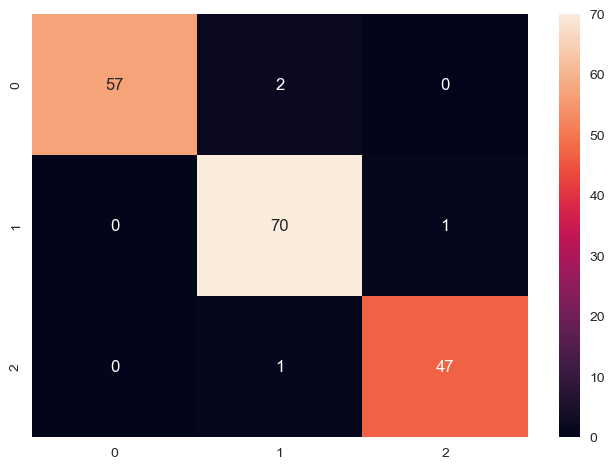

In [34]:
# TO DO: Implement best model
# I searched up how to make a confusion matrix and got some synatx from medium.com
#I got classification report from sklearn
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

wine_predictions = dtc.predict(X)
cf_matrix = confusion_matrix(y, wine_predictions)

sns.heatmap(cf_matrix, annot=True)
target_names = ['class 1', 'class 2', 'class 3']
print(classification_report(y, wine_predictions, target_names=target_names))

In [ ]:
# TO DO: Print confusion matrix using a heatmap

In [ ]:
# TO DO: Print classification report

## Questions (6 marks)
1. How do the training and validation accuracy change depending on the method used? Explain with values.
1. What are two reasons why the support vector machines model did not work as well as the tree-based model?
1. How many samples were incorrectly classified in step 5.2?
1. In this case, is maximizing precision or recall more important? Why?


<font color='Green'><b>YOUR ANSWERS HERE</b></font>
1. Both the training and validation accuracy improve drastically when the Decision Tree Classifier is used compared to the SVC. The average training accuracy for the Decision tree classifier is 97.6% compared to that of SVC which is 70.6%. The average validation accuracy for the Decision tree classifier is 86.5% compared to that of SVC which is 66.3%.

2. One reason might be that using an SVC might be too complex for this dataset, since we have 13 feature vectors being used for classification. Another reason might be that since an SVC assumes a linear decision boundary by default, it might not be able to find an optimal decision boundary in this case, since the relationship between the features and target variables is not linear for this dataset.

3. 2 samples actually belong to class 1 but were predicted as class 2. 1 sample actually belonged to class 2 but was predicted as class 3. 1 sample actually belonged to class 3 but was predicted as class 2. Thus, a total of 4 samples were incorrectly predicted.

4. Precision reflects the ability of the model to avoid false positives. So in this case one would probably want to maximize precision so that a person does not drink the wrong wine which might have ingredients that they are allergic to for example.





## Process Description (4 marks)
Please describe the process you used to create your code. Cite any websites or generative AI tools used. You can use the following questions as guidance:
1. Where did you source your code?
1. In what order did you complete the steps?
1. If you used generative AI, what prompts did you use? Did you need to modify the code at all? Why or why not?
1. Did you have any challenges? If yes, what were they? If not, what helped you to be successful?

<font color='Green'><b>DESCRIBE YOUR PROCESS HERE</b>

1. The data import was sourced from the UCI Machine Learning repo. The other import statements were sourced from scikit-learn.org. The confusion matrix and heatmap functions were sourced from medium.com. The classification_report function was sourced from scikit-learn.org.
    
2. The steps were completed in the order they were given.
    
3. Prompt1: How to read a 3x3 confusion matrix properly.
    
I was only used to the 2x2 confusion matrices in the lecture notes so I passed prompt1 to chatgpt to gain a better understanding on how to read the 3x3 matrix.
    
4. I had no challenges for this part. I was just able to get a clearer understanding of how to read the confusion matrix with the help of chatgpt.


</font>

# **Part 3: Observations/Interpretation (3 marks)**

Describe any pattern you see in the results. Relate your findings to what we discussed during lectures. Include data to justify your findings.

<font color='Green'><b>
ADD YOUR FINDINGS HERE
    
We found that the Decision Tree Classifier would be the best model for properly classifying the samples in this dataset. This is because it produced the highest training and validation accuracy. Also the confusion matrix showed that only 4 out of 178 samples were incorrectly classified(Hence the 97% training accuracy for the DTC training set). While the three models in the first part had a high training accuracy, they had a poor validation accuracy. This might be due to the fact that overfitting occured, thus the model learned the training data too well and might have captured noise or random fluctuations in the data instead of the existing patterns.
</b></font>

## **Part 4:** Reflection (2 marks)
Include a sentence or two about:
- what you liked or disliked,
- found interesting, confusing, challangeing, motivating
while working on this assignment.



<font color='Green'><b>
ADD YOUR THOUGHTS HERE
    
I found it interesting how the accuracy value of the DTC matched with the value we got when we used the cross_validate function. I also found it interesting how the regression models above might have learned the train data too well, causing overfitting with the test data.
</b></font>

## **Part 5:** Bonus Question (3 marks)

Repeat Part 2 and compare the support vector machines model used to `LinearSVC(max_iter=5000)`. Does using `LinearSVC` improve the results? Why or why not?

Is `LinearSVC` a good fit for this dataset? Why or why not?

In [ ]:
# TO DO: ADD YOUR CODE HERE


*ANSWER HERE*

In [38]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC

lin_svc = LinearSVC(max_iter=5000)
dtc = DecisionTreeClassifier(max_depth = 3)

lin_svc.fit(X, y)
dtc.fit(X, y)

lin_svc_scores = cross_validate(lin_svc, X, y, scoring='accuracy', cv=5, return_train_score=True)
dtc_scores = cross_validate(dtc, X, y, scoring='accuracy', cv=5, return_train_score=True)


avg_lin_svc_train_acc = np.mean(lin_svc_scores['train_score'])
avg_lin_svc_val_acc = np.mean(lin_svc_scores['test_score'])

avg_dtc_train_acc = np.mean(dtc_scores['train_score'])
avg_dtc_val_acc = np.mean(dtc_scores['test_score'])


print("LinearSVC:")
print(f"Average Training Accuracy: {avg_lin_svc_train_acc}")
print(f"Average Validation Accuracy: {avg_lin_svc_val_acc}\n")

print("Decision Tree classifier:")
print(f"Average Training Accuracy: {avg_dtc_train_acc}")
print(f"Average Validation Accuracy: {avg_dtc_val_acc}\n")

results = pd.DataFrame(columns=['Model', 'Training accuracy', 'Validation accuracy'])
results.loc[len(results)] = ["Linear SVC", avg_lin_svc_train_acc, avg_lin_svc_val_acc]
results.loc[len(results)] = ["DTC", avg_dtc_train_acc, avg_dtc_val_acc]
print(results)

/Users/ej/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/ej/anaconda3/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Users/ej/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/ej/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/ej/anaconda3/lib/python3.11/si

LinearSVC:
Average Training Accuracy: 0.9017531764010638
Average Validation Accuracy: 0.8758730158730158

Decision Tree classifier:
Average Training Accuracy: 0.9747562296858071
Average Validation Accuracy: 0.8876190476190476

        Model  Training accuracy  Validation accuracy
0  Linear SVC           0.901753             0.875873
1         DTC           0.974756             0.887619


/Users/ej/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/ej/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/ej/anaconda3/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Users/ej/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/ej/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was pas

In [ ]:
print("Using LinearSVC is often more scalable than SVC with a linear kernel, particularly for high-dimensional datasets. It can handle large numbers of features more efficiently because it does not need to compute the kernel matrix.")